In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [2]:
df=pd.read_csv('product j.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product J,Cough Suppressant,January,2019,63722,238469,164221,1
2019-02-01,Product J,Cough Suppressant,February,2019,76987,288111,198407,2
2019-03-01,Product J,Cough Suppressant,March,2019,99645,372905,256800,3
2019-04-01,Product J,Cough Suppressant,April,2019,68529,256458,176610,4
2019-05-01,Product J,Cough Suppressant,May,2019,45119,168850,116279,5
2019-06-01,Product J,Cough Suppressant,June,2019,39059,146172,100661,6
2019-07-01,Product J,Cough Suppressant,July,2019,36898,138085,95092,7
2019-08-01,Product J,Cough Suppressant,August,2019,45234,169281,116575,8
2019-09-01,Product J,Cough Suppressant,September,2019,56459,211288,145504,9


In [4]:
sales_j= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [5]:
sales_j.shape

(60, 3)

In [6]:
sales_j.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [7]:
print('Total Sales:', sales_j['Sales'].sum())
print('Total Market Size:',sales_j['Market Size'].sum())
print('Total Marketing Expense:', sales_j['Marketing Expense'].sum())

Total Sales: 4532957
Total Market Size: 15875623
Total Marketing Expense: 13689118


Text(0.5, 1.0, 'Product J')

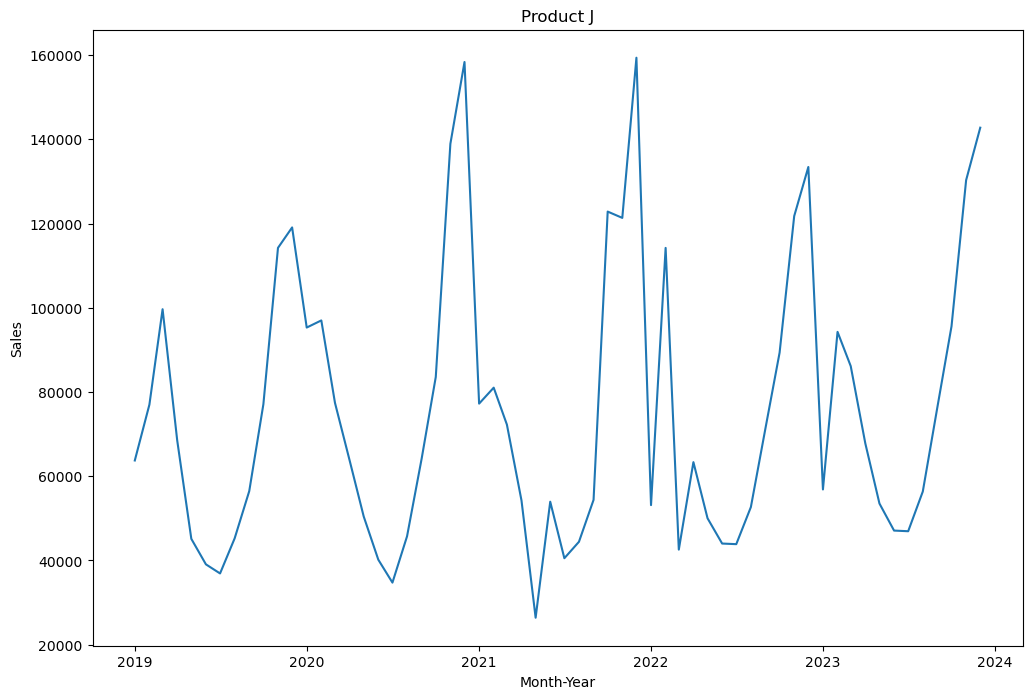

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_j['Sales'])
plt.title('Product J')

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adf_test(sales_j['Sales'])

ADF Statistics: -2.3759301997991913
p- value: 0.14864548261740318
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
sales_j_diff= sales_j['Sales'].diff().dropna()

Text(0.5, 1.0, 'Product J - First Difference')

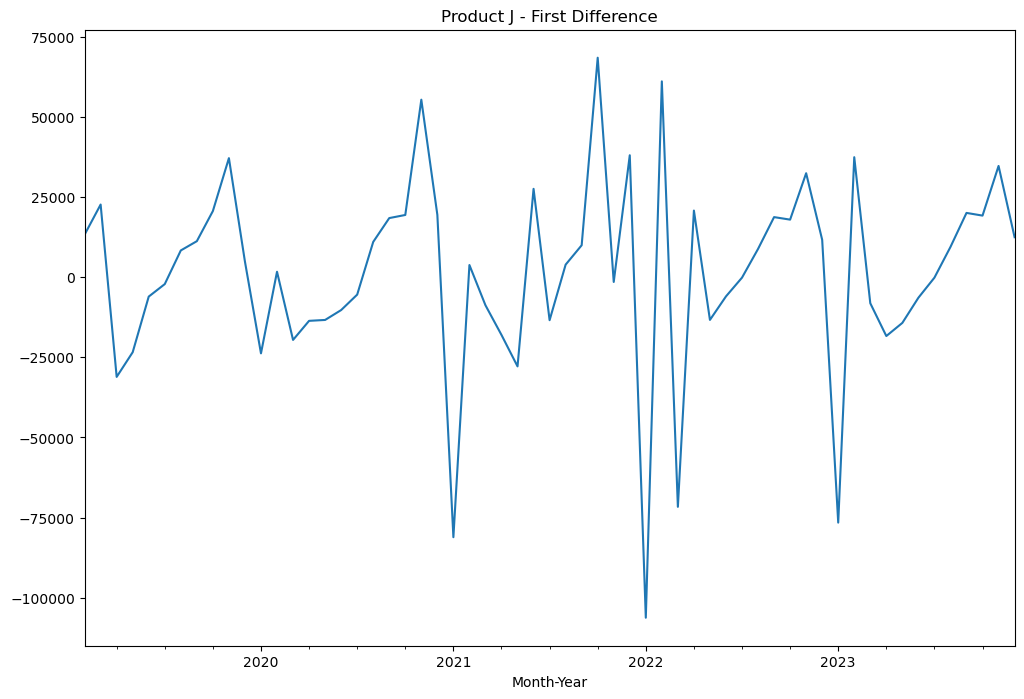

In [13]:
sales_j_diff.plot(figsize=(12,8))
plt.title('Product J - First Difference')

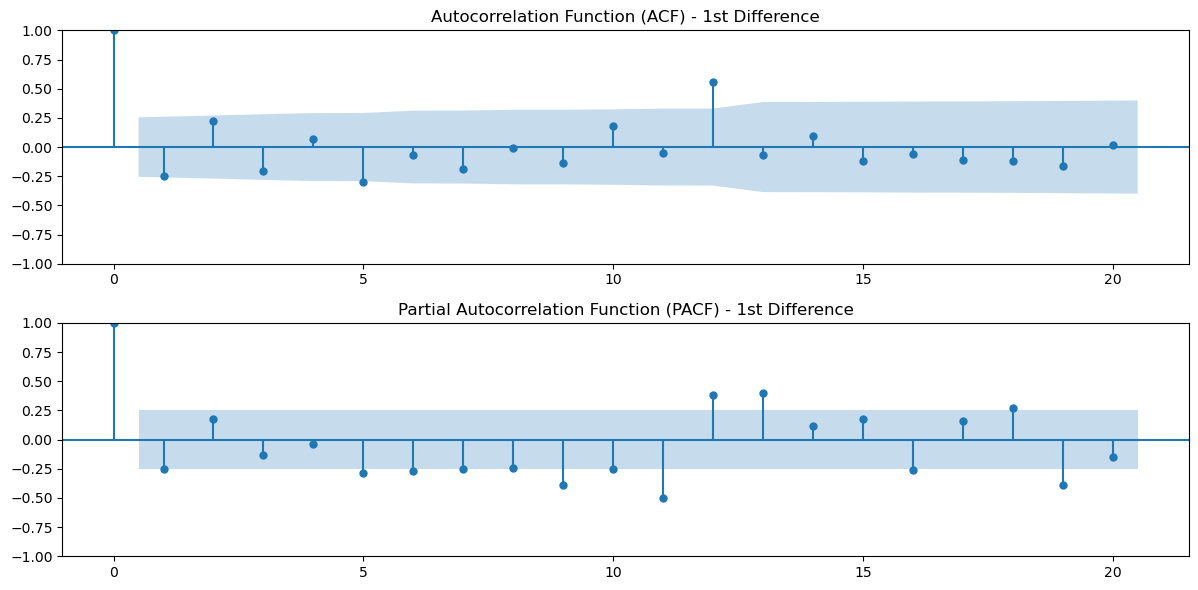

In [14]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_j_diff, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - 1st Difference')

plt.subplot(212)
plot_pacf(sales_j_diff, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - 1st Difference')

plt.tight_layout()
plt.show()

In [15]:
adf_test(sales_j_diff)

ADF Statistics: -6.410493361286657
p- value: 1.896152982571653e-08
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
train= sales_j[:48]
test=sales_j[48:]

In [17]:
len(train)

48

In [18]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [19]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [20]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [21]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,1,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_j)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [22]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
1   0  1  1075.265529  1082.666120  21761.627325  5.961788e+08  24416.773884
4   1  1  1077.243416  1086.494154  21855.144881  5.968524e+08  24430.561873
7   2  1  1077.693675  1088.794561  21735.530292  6.642469e+08  25772.986936
2   0  2  1078.788261  1088.038999  22017.852459  5.995561e+08  24485.834792
10  3  1  1079.687918  1092.638952  21777.100350  6.662680e+08  25812.168582
5   1  2  1080.090398  1091.191283  22403.013847  6.267935e+08  25035.844658
8   2  2  1080.960127  1093.911160  21856.777800  6.676531e+08  25838.984933
13  4  1  1081.914684  1096.715864  21771.552128  6.688139e+08  25861.435862
11  3  2  1082.896389  1097.697570  21891.360219  6.709129e+08  25901.985533
16  5  1  1083.871978  1100.523306  21660.794817  6.608149e+08  25706.321081
9   3  0  1083.971584  1095.072470  33967.601687  1.291104e+09  35931.935524
6   2  0  1084.121440  1093.372178  39911.039368  1.747891e+09  41807.786152

In [23]:
m_arima= ARIMA(train['Sales'], order=(0,1,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -533.633
Date:                Thu, 09 May 2024   AIC                           1075.266
Time:                        19:05:37   BIC                           1082.666
Sample:                    01-01-2019   HQIC                          1078.050
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2183      0.057      3.802      0.000       0.106       0.331
Marketing Expense     0.0380      0.069      0.552      0.581      -0.097       0.173
ma.L1                -0.

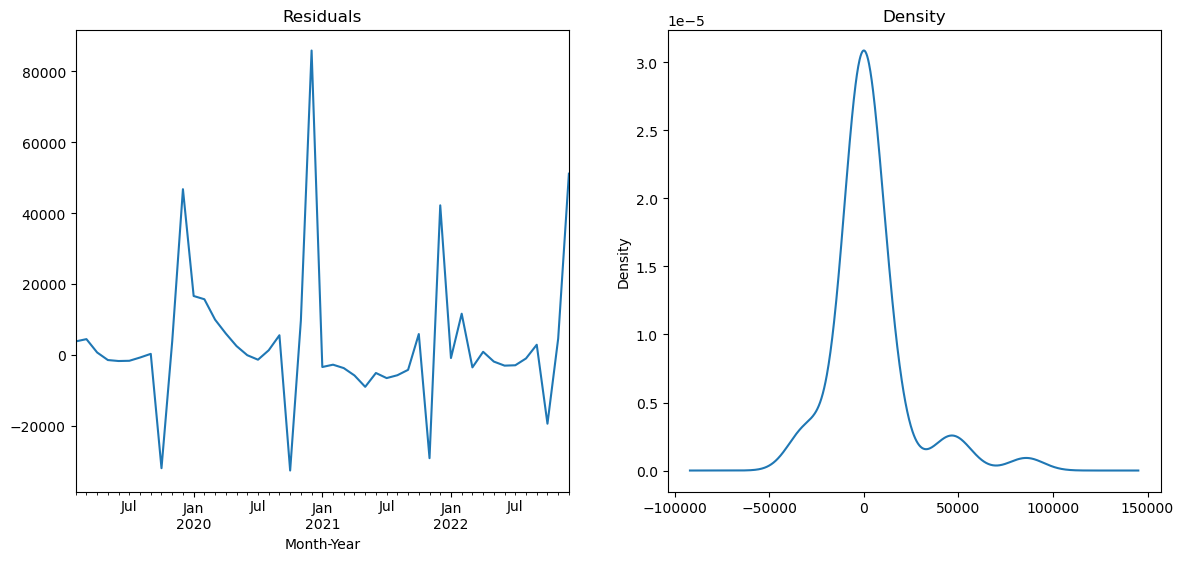

In [24]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

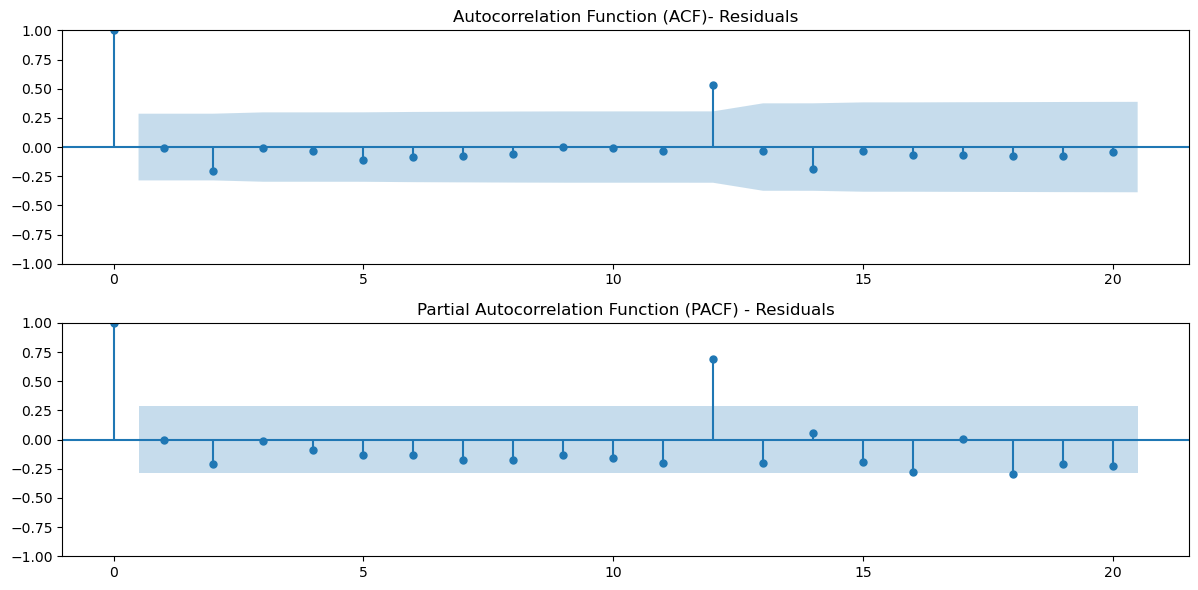

In [25]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

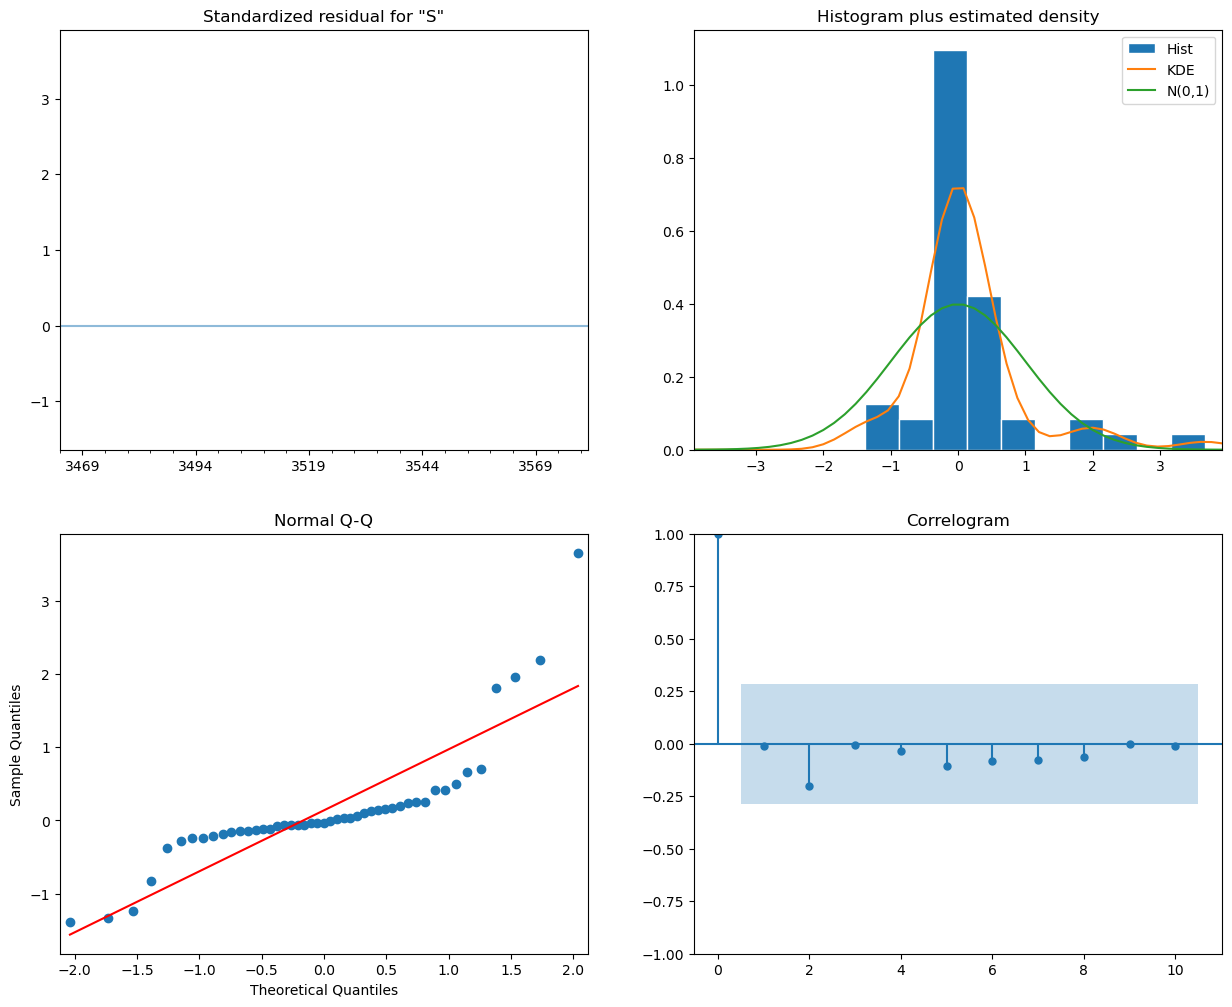

In [26]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [28]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [29]:
pred=model_arima.predict(start=len(train), end=(len(sales_j)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_j['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

In [30]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

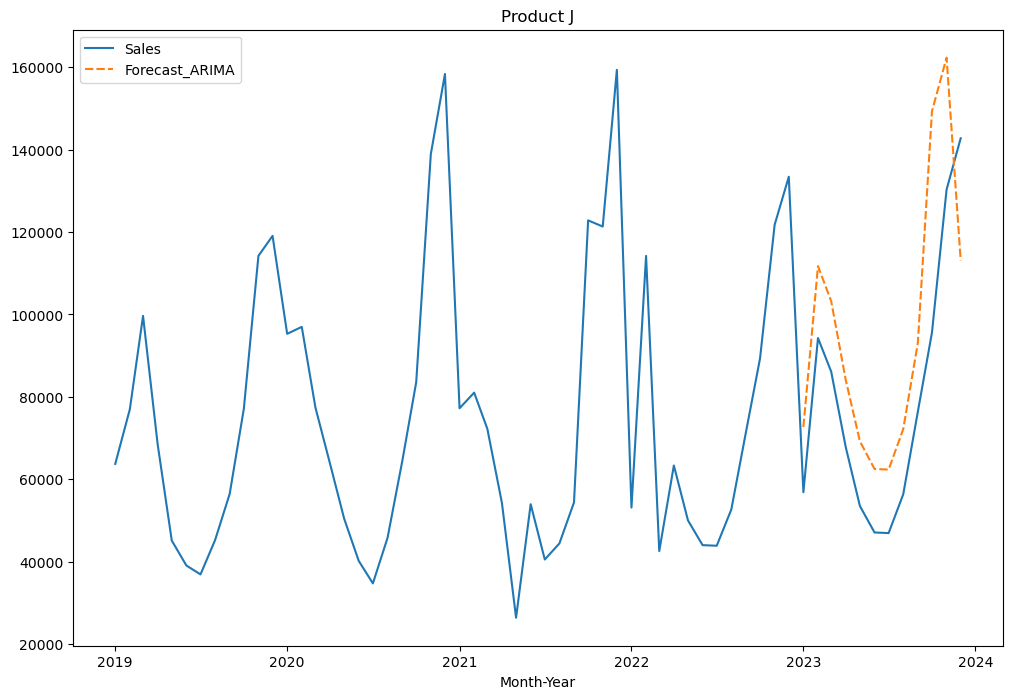

In [31]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j[['Sales','Forecast_ARIMA']])
plt.title('Product J')
plt.show()

In [32]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 21761.62732496539
MAPE - ARIMAX: 0.28059994892201495
MSE - ARIMAX: 596178846.888156
RMSE - ARIMAX: 24416.773883708636


# SARIMA

In [33]:
import statsmodels.api as sm

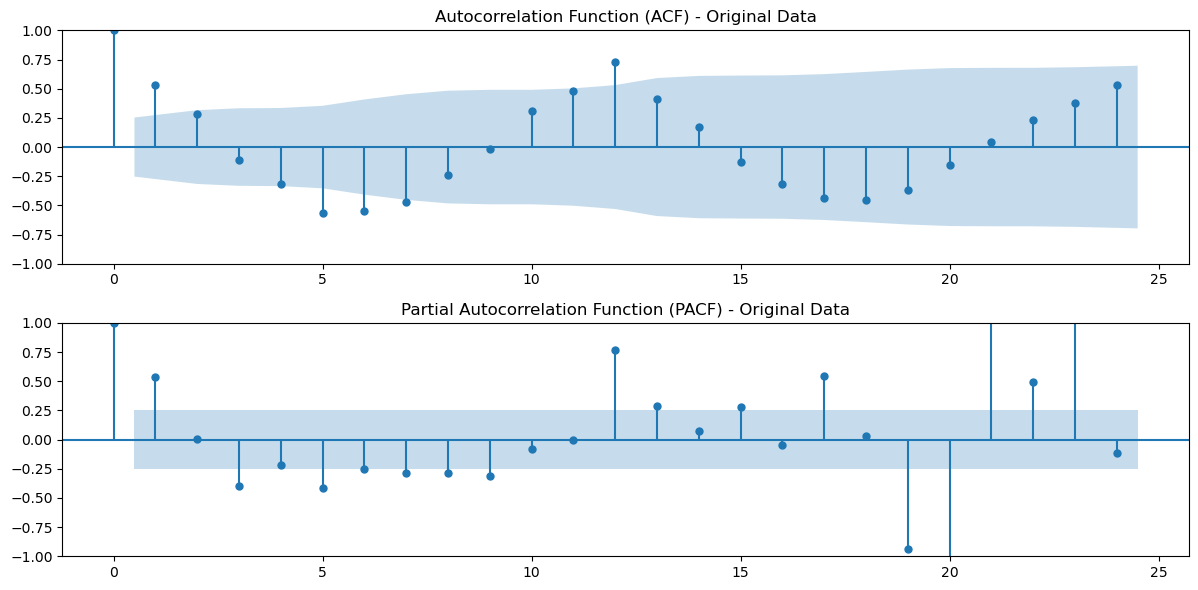

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_j['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_j['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

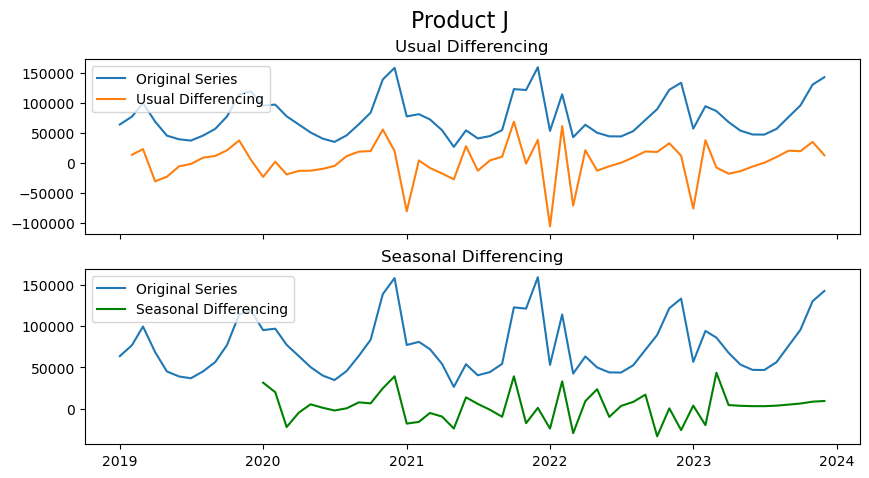

In [35]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_j['Sales'], label='Original Series')
axes[0].plot(sales_j['Sales'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_j['Sales'], label='Original Series')
axes[1].plot(sales_j['Sales'].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Product J', fontsize=16)
plt.show()

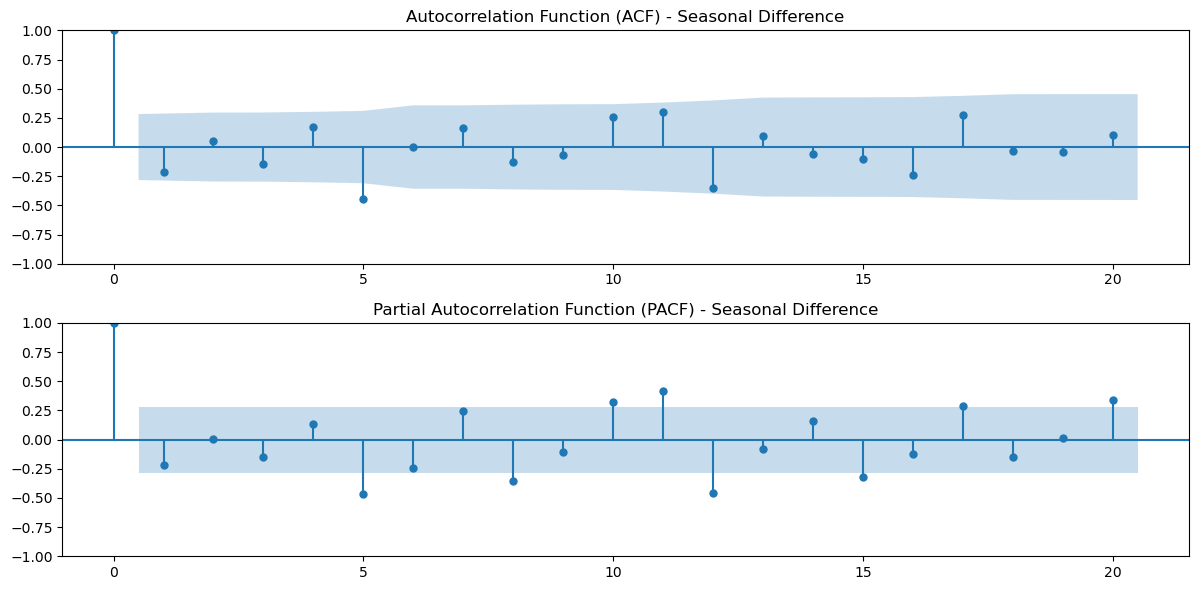

In [36]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_j['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Seasonal Difference')

plt.subplot(212)
plot_pacf(sales_j['Sales'].diff(12).dropna(), lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Seasonal Difference')

plt.tight_layout()
plt.show()

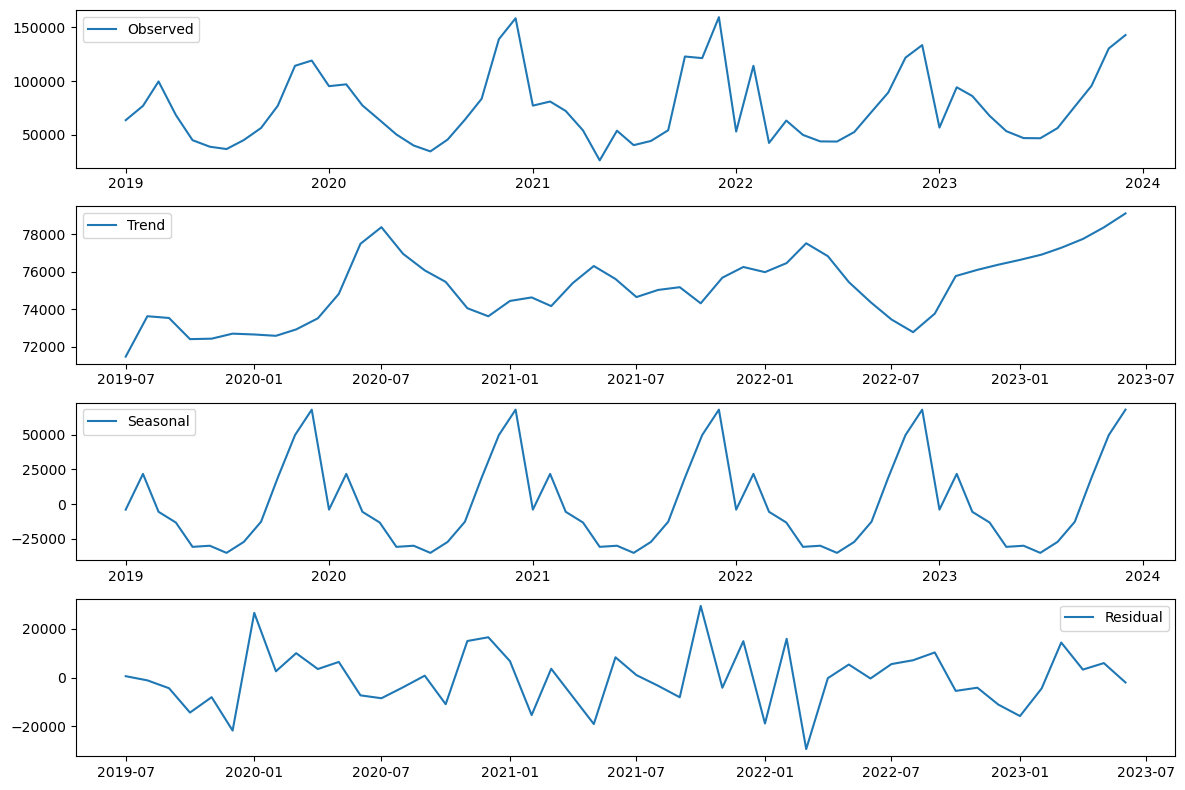

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_j['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [38]:
order_SARIMAX=[]
# Loop over P order
for P in range(6):
    # Loop over Q order
    for Q in range(2):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 1, 1), seasonal_order=(P, 1, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [39]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q         aic         bic           mae           mse
1   0  1  787.545607  795.322348  20726.835969  4.694854e+08
4   2  0  788.230324  797.562412  23993.332417  6.214838e+08
3   1  1  789.433536  798.765624  20984.665047  4.777698e+08
2   1  0  789.578031  797.354772  18920.073907  4.161331e+08
0   0  0  790.071871  796.293263  19738.071187  4.450614e+08
6   3  0  790.201763  801.089199  23911.239781  6.240842e+08
5   2  1  790.206805  801.094242  23936.339846  6.237835e+08
8   4  0  792.185880  804.628664  23882.528249  6.251699e+08
7   3  1  792.195431  804.638216  23891.840964  6.244156e+08
10  5  0  794.185880  808.184013  23882.536485  6.251705e+08
9   4  1  794.186237  808.184369  23892.425222  6.258274e+08
11  5  1  796.185883  811.739364  23884.726945  6.252707e+08


In [40]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 1, 1),seasonal_order=(0,1,1,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -388.773
Date:                            Thu, 09 May 2024   AIC                            787.546
Time:                                    19:07:35   BIC                            795.322
Sample:                                01-01-2019   HQIC                           790.230
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.2520      0.061      4.114      0.000       0.132       0.372
Marketing Expe

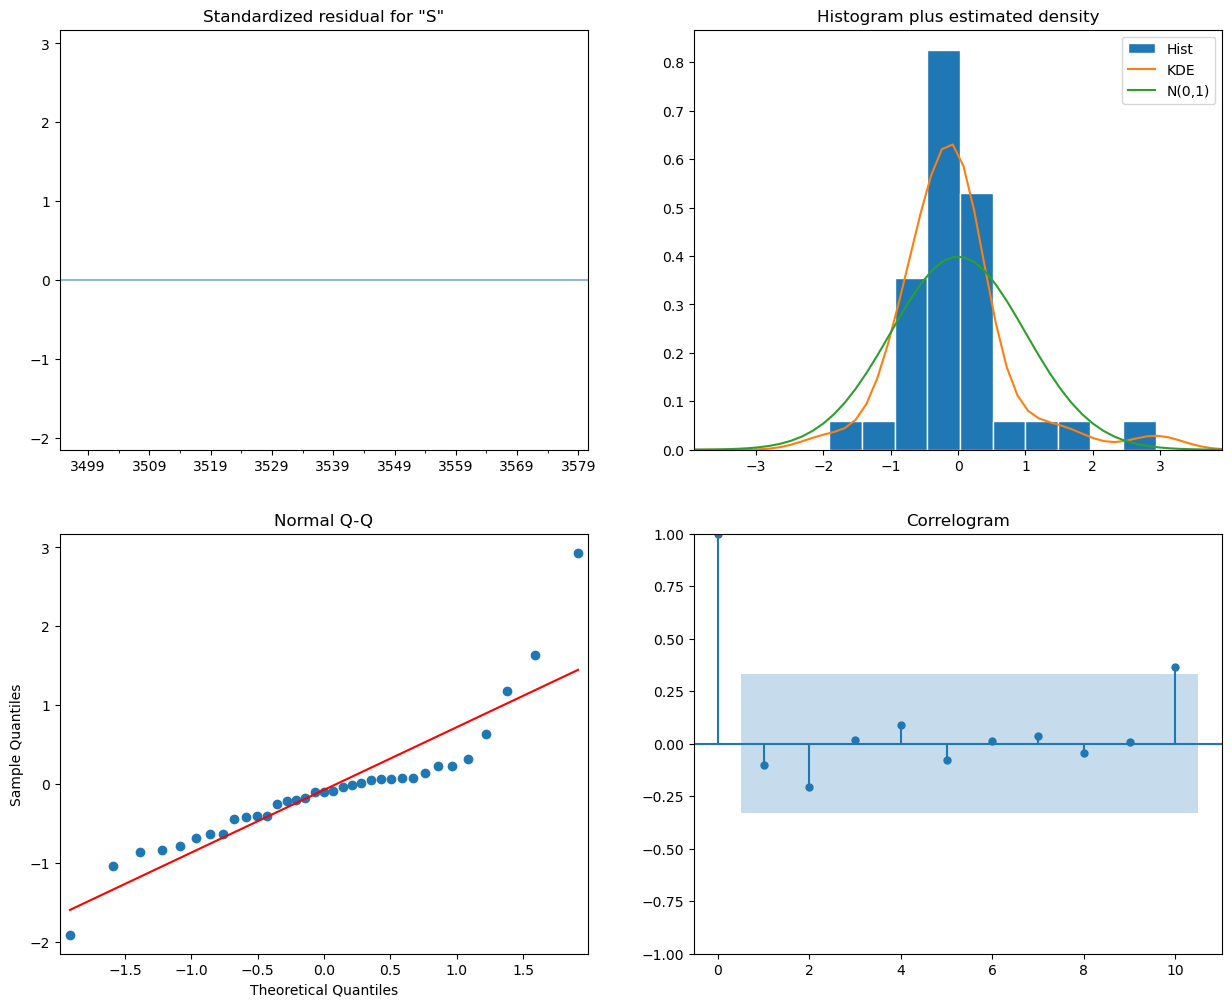

In [41]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
forecast_test_sarima=sarima_model.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [43]:
sales_j['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product J')

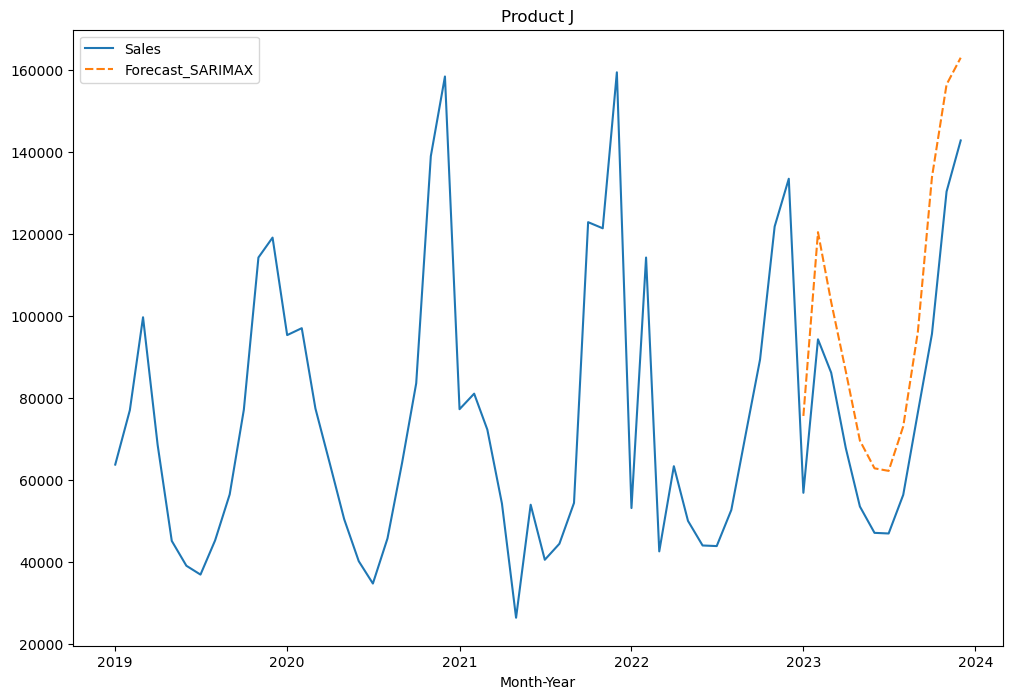

In [44]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j[['Sales','Forecast_SARIMAX']])
plt.title('Product J')

In [45]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 20726.836
MAPE - SARIMAX: 0.278
MSE - SARIMAX: 469485390.468
RMSE - SARIMAX: 21667.612


# AUTO-ARIMA

In [46]:
import pmdarima as pm

In [47]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=1, start_q=0, max_p=6,max_q=3,
                          start_P=0, D=1, start_Q=0, max_P=6 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=822.366, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=822.181, Time=0.08 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=824.201, Time=0.17 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=822.151, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=823.904, Time=0.26 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=825.599, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=825.010, Time=1.04 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=826.914, Time=1.91 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=828.841, Time=3.48 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=827.010, Time=1.42 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=828.914, Time=1.64 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=829.010, Time=3.17 sec
 ARIMA(0,1,1)(0,1,0)[1

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [48]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -404.761
Date:                            Thu, 09 May 2024   AIC                            813.521
Time:                                    19:09:56   BIC                            816.632
Sample:                                01-01-2019   HQIC                           814.595
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4391      0.097     -4.508      0.000      -0.630      -0.248
sigma2      5.709e+08   4.78e-12   1.19e+20      0.000    5.71e+08    5.71e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.26   Prob(JB):                         0.77
Heteroskedasticity (H):               0.98   Skew:                            -0.20
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.48e+37. Standard errors may be unstable.
"""

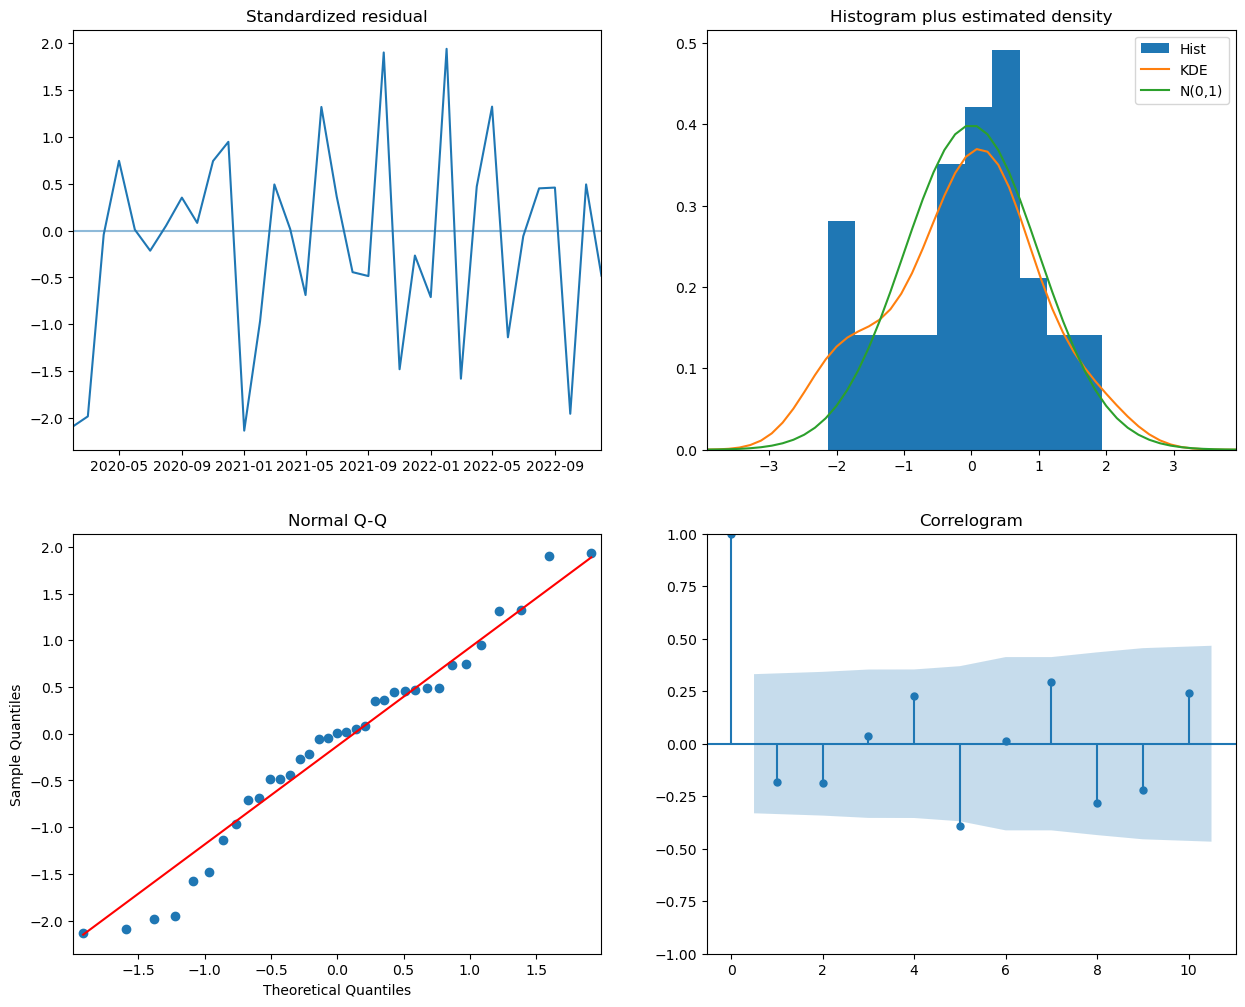

In [49]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [50]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_j['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product J')

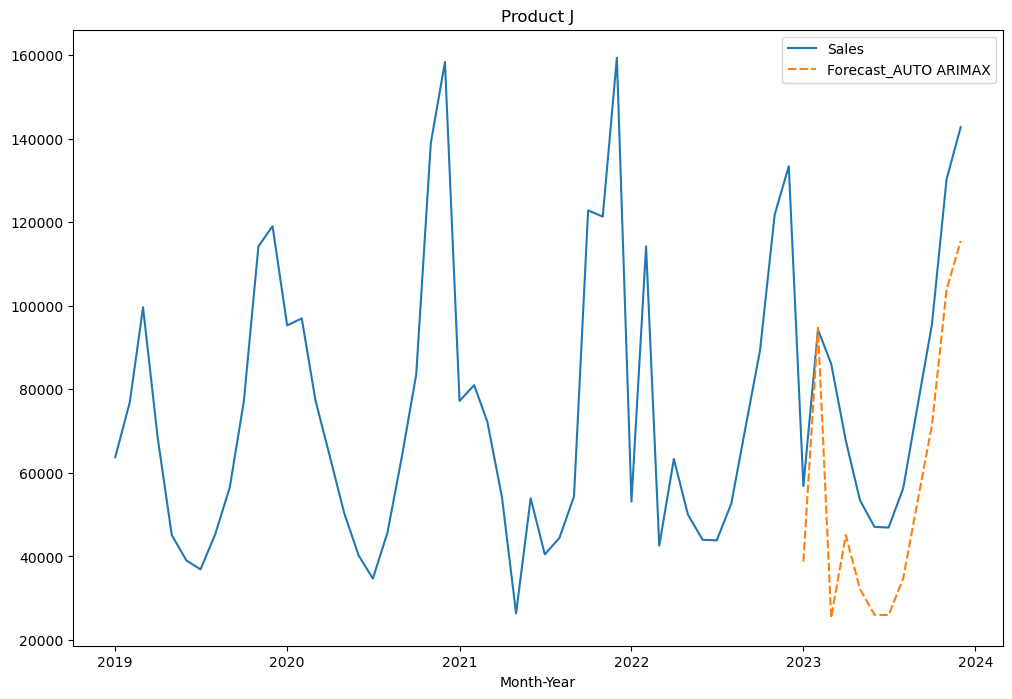

In [51]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product J')

In [52]:
mae_auto_arimax= mean_absolute_error(test['Sales'],forecast_test_auto)
mape_auto_arimax= mean_absolute_percentage_error(test['Sales'],forecast_test_auto)
mse_auto_arimax=mean_squared_error(test['Sales'],forecast_test_auto)
rmse_auto_arimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto))

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 23964.858086872206
MAPE - AUTO ARIMAX: 0.33194854711394367
MSE - AUTO ARIMAX: 740366670.3103
RMSE - AUTO ARIMAX: 27209.679717157644


In [53]:
sales_j.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMA,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,56843,223425,276651,72685.544621,75583.384743,38758.168644
2023-02-01,94268,370526,458797,111727.575865,120389.058860,94754.648601
2023-03-01,86135,338559,419214,103243.214463,103375.323245,25338.593314
2023-04-01,67767,266362,329818,84081.470615,86479.159548,45131.661752
2023-05-01,53500,210285,260381,69198.078105,69573.652395,32229.391628
2023-06-01,47080,185051,229135,62500.718102,62810.160549,26040.256898
2023-07-01,46924,184438,228376,62338.023470,62190.443315,25977.306503
2023-08-01,56348,221479,274242,72169.080577,73044.344269,34748.839182
2023-09-01,76393,300267,371800,93080.169205,96033.183758,53498.852088


In [54]:
sales_j.mean()

Sales                    75549.283333
Market Size             264593.716667
Marketing Expense       228151.966667
Forecast_ARIMA           96313.219833
Forecast_SARIMAX        100218.919303
Forecast_AUTO ARIMAX     55608.333347
dtype: float64

In [55]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,21761.627325,0.280600,5.961788e+08,24416.773884
AUTO ARIMAX,23964.858087,0.331949,7.403667e+08,27209.679717
SEASONAL ARIMAX,20726.835969,0.278157,4.694854e+08,21667.611554


# TESTING 

In [21]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=815.760, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=816.527, Time=0.06 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=817.970, Time=0.20 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=816.700, Time=0.07 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=818.294, Time=0.25 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=817.701, Time=0.21 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=820.025, Time=1.68 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=817.889, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=818.390, Time=0.21 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=819.907, Time=0.45 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=818.578, Time=0.14 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=820.194, Time=0.44 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,0,1)(2,1,0)[1

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [22]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   48
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -405.880
Date:                  Wed, 08 May 2024   AIC                            815.760
Time:                          20:20:07   BIC                            818.927
Sample:                      01-01-2019   HQIC                           816.865
                           - 12-01-2022                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1045.7500   3236.297      0.323      0.747   -5297.276    7388.776
sigma2      3.634e+08   1.05e+08      3.464      0.001    1.58e+08    5.69e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.22   Prob(JB):                         0.65
Heteroskedasticity (H):               1.39   Skew:                             0.22
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_j['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product J')

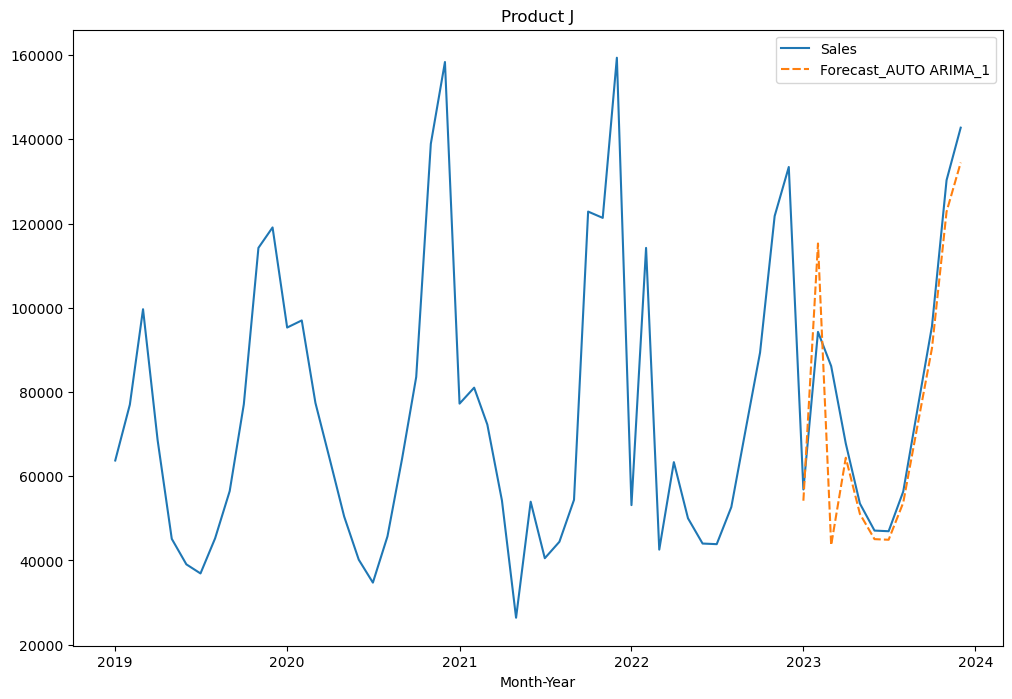

In [24]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_j[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product J')

In [26]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 8638.458333333334
MAPE - AUTO ARIMA: 0.10118087776206881
MSE - AUTO ARIMA: 204713259.85416666
RMSE - AUTO ARIMA: 14307.804159065312
